<a href="https://colab.research.google.com/github/amalbumbia/Li_Group_UT_Austin/blob/main/Linear_Absorption_data_analysis_unfinished.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Linear Absorption Spectroscopy

**WHAT**: We hit our sample with a set of wavelengths $\lambda$ of light, and we measure how much of that light is absorbed.



---



**WHY**: Certain wavelengths will excite electrons in the sample. We are looking for a type of excitation called an <u>exciton</u>. An exciton is a quasiparticle consisting of an electron excited above the valence band and the positively charged <u>hole</u> it leaves behind. The electron is still bound with the hole, so the system acts as one particle, an exciton. An exciton is compared to a hydrogen atom since it consists of a positively charged particle and a negatively charged particle bound together.



---



**HOW**: There are multiple ways to measure linear absorption, such as <u>Transmission Spectroscopy</u> and <u>Differential Reflection Spectroscopy</u>. In our lab we use DR Spectroscopy.

# Transmission Spectroscopy: Experiment Set Up

- Equipment: Laser/Light source, sample, and detector/spectrometer

- Direct light source at sample, then read the light coming through the other side

-Compare light intensity on the other side with initial intensity: this tells us how much light was absorbed by the sample.

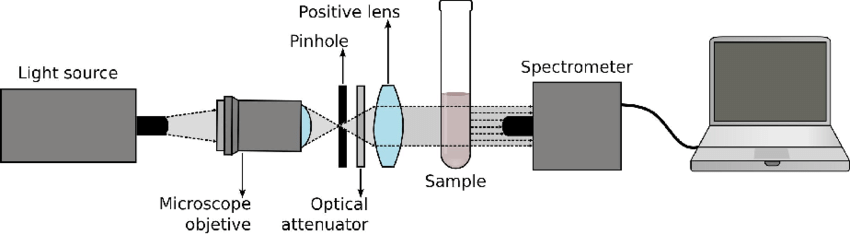
-Barragán, R.C. & Garcia-Torales, Guillermo & Rodríguez, Antonio & Flores, Jorge L.. (2014). Spectroscopic measurement of ignition parameters in forest Fuel. Proceedings of SPIE - The International Society for Optical Engineering. 9219. 10.1117/12.2061167.

# Results of Experiment

- Absorption measured using: A = -ln(I/I_0)

- Vary the wavelength of light source to get absorption spectroscopy graph

- Shows absorption as a function of wavelength or energy

- Peaks in the shape of a lorentzian

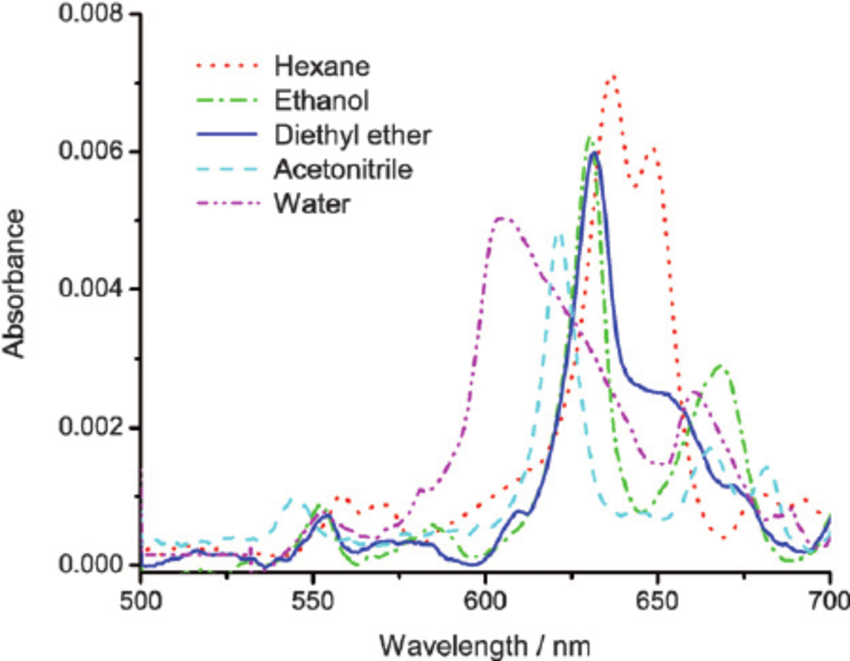
-Seetohul, Lalitesh & Ali, Zulfiqur & Islam, Meez. (2009). Liquid-phase broadband cavity enhanced absorption spectroscopy (BBCEAS) studies in a 20 cm cell. The Analyst. 134. 1887-95. 10.1039/b907316g.

# Information From Data

- Energy of peak is at the transition energy for electron levels of the sample

- This is the energy an exciton is formed

- Lifetime of the exciton is related to the linewidth of the peak

- The width of the peak is also releated to enviromental effect

# Measuring Linear Absorption via Differential Reflection Spectroscopy

# Experiment Set Up
- White light and CCD Camera for imaging - enables us to look at our substrate and locate our sample, so we can position our sample such that it will get hit in the right place by our excitation light.
- broadband LED light - will hit our sample and create excitons (at certain wavelengths)
- Spectrometer with CCD and diffraction grating - will split light into certain wavelengths, so that we can measure the differential reflection for each wavelength. The number of grooves of the diffraction grating is how many wavelength ranges the light is split into.
- Beam splitters to split path of excitation, reflection, and imaging light





![ahh](https://drive.google.com/uc?export=view&id=1VmM_JUVHO9UdK17vtDhi3zJgKsv3-n6Q)

Kiper, Natasha, et al. "Confined Trions and Mott-Wigner States in a Purely Electrostatic Moir\'e Potential." arXiv preprint arXiv:2407.20905 (2024).

# Data Analysis

Our raw reflection data is $R_{sam}$, and it depends on the reflectivity of both our sample, and the substrate underneath. However, we are only interested in our sample! So, we calculate the <u>differential reflection</u> which is

$\frac{R_{sam} - R_{sub}}{R_{sub}}$

where $R_{sam}$ is the raw reflection from the sample, and $R_{sub}$ is reflection from just the substrate. $R_{sub}$ is our background because we obtain this by shooting light onto an area of the substrate where we do not have our sample. We care about differential reflection because it shows changes in reflection that are due to solely the sample, and not the substrate.

When we plot DR, the <u>dispersive lorentzian function</u> can fit the peaks in the graph. This is an example of a dispersive lorentzian function:

![dispersive lorentzian](https://drive.google.com/uc?export=view&id=1tNf2eJl82xw1NmAycGDOzpuNP5EHyGFX)

This is the equation: $R_D(E,E_0,\gamma,A,\alpha,h) = A\cos(\alpha)\frac{\gamma/2}{(E_0-E)^2 + (\gamma/2)^2} + A\sin(\alpha)\frac{E_0-E}{(E_0-E)^2+(\gamma/2)^2} + h$

$E_0$: peak energy - aka exciton resonance energy (explained below)

$\gamma$: homogenous linewidth. Equal to the dephasing rate of exciton (explained below)

$A$: amplitude

$\alpha$: phase angle

$h$: height of the entire function - needed to add this parameter in order to have a successful curve fit

Note that these variables are not always what they seem - for example, in most dispersive lorentzians, $A$ is not the difference between max and min of the function, contrary to what the title 'Amplitude' may suggest. Keep this in mind when making initial guess for curve fit!



Now we will discuss







Now we will discuss what information the homogenous linewidth gives us. $\gamma$ is the sum of all the decay rates of the exciton. Excitons are short lived, and the electron will eventually return to its original valence band state. An exciton can 'die' in multiple ways:

radiative decay rate ($r_{rad}$): exciton emits photon

non-radiative decay rate ($r_{nonrad}$): exciton emits some other particle/quasiparticle to release energy, such as a phonon

pure dephasing rate ($\gamma^*$): this is the rate at which an excited pure state loses coherence and becomes a mixed state

We also introduce parameters $T_1$ and $T_2$ and the reciprocal for the main decay rates:

We have $\Gamma = \frac{\hbar}{T_1} = r_{rad} + r_{nonrad}$ - excited state relaxation rate

And $\gamma = \frac{\hbar}{T_2} = \frac{\Gamma}{2} + \gamma^*$ - dephasing rate. This is the homogenous linewidth.

Why is it called homogenous linewidth? Because the dephasing rate $\gamma$ is only the linewidth of the peak when the sample is homogenous. Mostly, the sample is not completely homoegenous and this means the lorentzian peaks are shiften around. Instead of one peak, we have multiple peaks wirh $\gamma$ linewidth at slightly different peak energies $E_0$. The peaks add up and we get a broad peak as a result. We call this inhomogenous broadening.

The linewidth can be broadened like this by environmental effects such as defects in the sample.


# Sample Data Analysis

This code analyzes exciton peak intensity from spectroscopic data. We process reflection spectra and calculates the differential reflectivity (ΔR/R) with respect to a background measurement.

In [ ]:
# Set variables
grating = 2000 # we take measurment from 2000 different wavelengths of light
range_vals = np.arange(1, grating+1)
background = np.zeros(grating)
averagecounts = 5


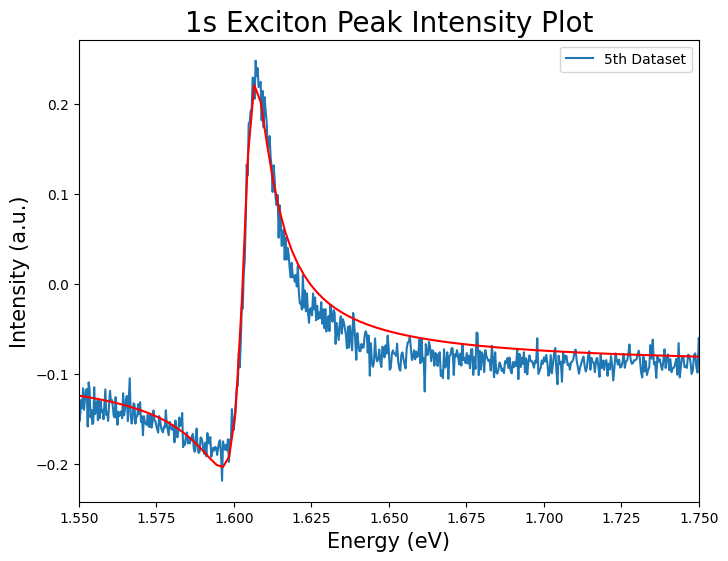

linewidth is 0.009525742863120043 and peak energy is 1.6041294066671916
[ 1.60412941  0.00952574  0.00203126 -1.06822141 -0.09336881]


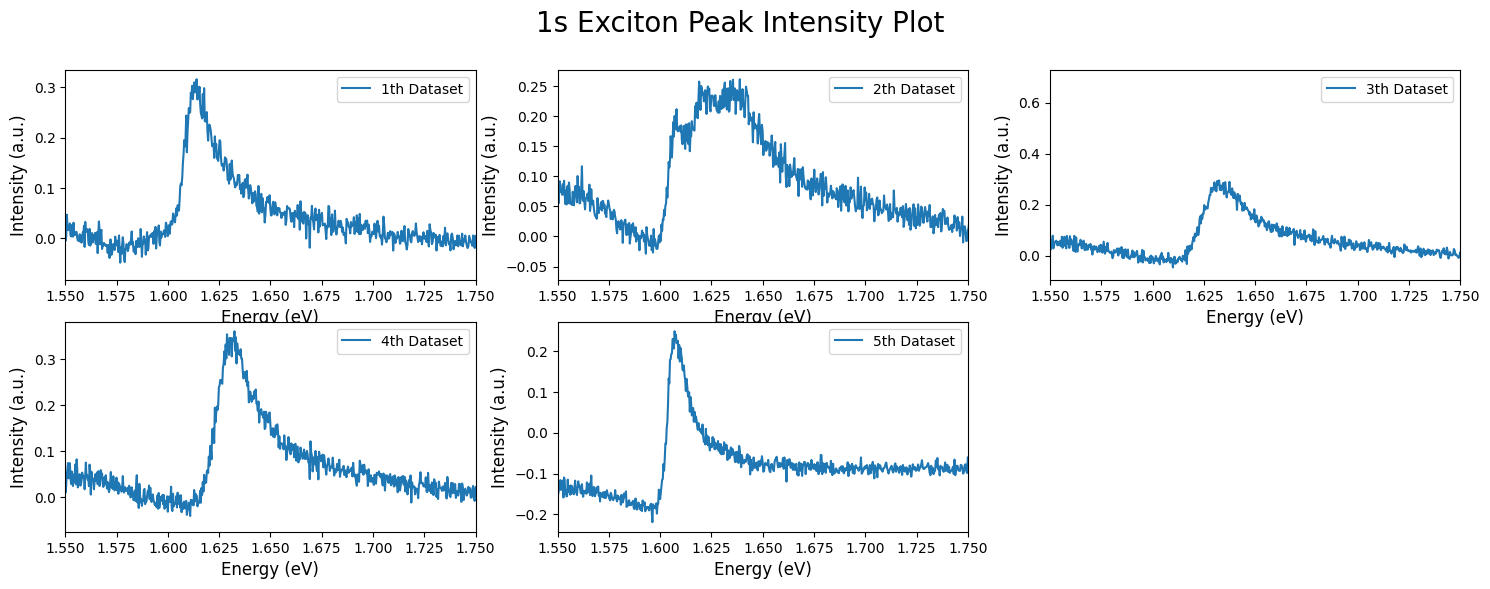

In [ ]:
# Import data
def load_data(file_path):
    return pd.read_csv(file_path, delimiter='\t', usecols=[0], names=["lambda"], skiprows=1)

# Load lambda (wavelength) data from a specific file
lambda_data = load_data('/content/drive/MyDrive/RESEARCH/Li_group/Data_analysis/20240827/750Acquisition.asc')
lambda_vals = lambda_data["lambda"].values

# Input background data
def import_data(file):
    return np.loadtxt(file, delimiter='\t')

# Background data
numofbk = 2
pathback = '/content/drive/MyDrive/RESEARCH/Li_group/Data_analysis/20240827/'
for i in range(numofbk):
    back_file = f'{pathback}bk{i+1}.asc'
    background_data = import_data(back_file)[:, 1]
    background += background_data

# Average background
background /= numofbk

# Reflection and delta R/R calculation
numofdata = 5
reflection = np.zeros((grating, numofdata))
deltaRoverR = np.zeros((grating, numofdata))

pathdata = '/content/drive/MyDrive/RESEARCH/Li_group/Data_analysis/20240827/'
for i in range(numofdata):
    data_file = f'{pathdata}5s_wse2_tutuc_{i+1}.asc'
    data = import_data(data_file)[:, 1]
    reflection[:, i] = data
    deltaRoverR[:, i] = (data - background) / background

# Convert wavelength to energy
energy = 1240 / lambda_vals

# Plotting deltaR/R for the 5th dataset
plt.figure(figsize=(8, 6))
min_len = min(len(energy), len(deltaRoverR[:, 4]))
plt.plot(energy[:min_len], deltaRoverR[:min_len, 4], label = '5th Dataset')
# Plot settings
plt.xlim([1.55, 1.75])
plt.xlabel('Energy (eV)', fontsize=15)
plt.ylabel('Intensity (a.u.)', fontsize=15)
plt.title('1s Exciton Peak Intensity Plot', fontsize=20)
plt.legend()

# Define the Lorentzian function
def lorentzian(x, E_0, l, A, a, h):
  return (A * np.cos(a) * (l/2)) / ((E_0-x)**2 + (l/2)**2) + \
         (A * np.sin(a) * (E_0-x)) / ((E_0-x)**2 + (l/2)**2) + h

# Initial guesses for Lorentzian parameters
E_0_guess = 1.631  # Center of the Lorentzian peak
l_guess = 0.005  # Width of the Lorentzian
A_guess = (np.max(deltaRoverR[:min_len, 4])-np.min(deltaRoverR[:min_len, 4]))/2  # Amplitude
a_guess = 0 # Phase angle (can start at 0)
h_guess = 0

initial_guess = [E_0_guess, l_guess, A_guess, a_guess, h_guess]

# Executing curve fit
popt, pcov = curve_fit(lorentzian, energy[:min_len], deltaRoverR[:min_len, 4], p0 = initial_guess, maxfev = 2000)

# popt is a list of the best fit values for parameters of lorentzian function
peakenergy = popt[0]
linewidth = popt[1]

# Plot best fit graph and the left and right peak positions
x = np.linspace(1.550, 1.750, 100)
best_fit = lorentzian(x, peakenergy, linewidth, popt[2], popt[3], popt[4])
plt.plot(x, best_fit, c = 'r', label = 'Best fit')
plt.show()
print(f'linewidth is {linewidth} and peak energy is {peakenergy}')
print(popt)

# Plotting deltaR/R for the other datasets
plt.figure(figsize=(18, 6))
plt.suptitle('1s Exciton Peak Intensity Plot', fontsize=20)
min_lens = [min(len(energy), len(deltaRoverR[:, i])) for i in range(numofdata)]
for i in range(numofdata):
    plt.subplot(2, 3, i+1)
    plt.plot(energy[:min_lens[i]], deltaRoverR[:min_lens[i], i], label=f'{i+1}th Dataset')
    # Subplot settings
    plt.xlim([1.55, 1.75])
    plt.xlabel('Energy (eV)', fontsize=12)
    plt.ylabel('Intensity (a.u.)', fontsize=12)
    plt.legend()

plt.show()




Silicon bk: linewidth is 0.008305594462728617, peak energy is 1.6061385149111764
0.002
hbn bk: linewidth is 0.017855229382904028, peak energy is 1.601048472135674


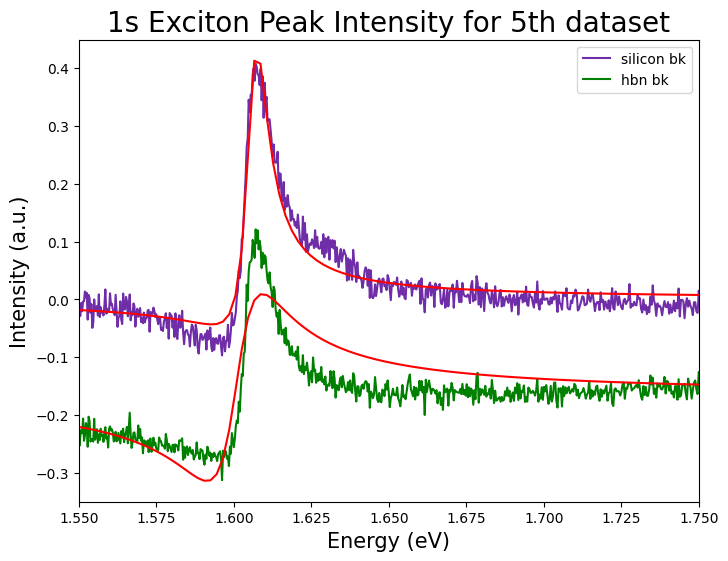

In [ ]:
# Now, we find delta R over R of dataset 5 corresponding to each background taken
# Background data
numofbk = 2
deltaRoverR_5 = np.zeros((grating, numofbk))
pathback = '/content/drive/MyDrive/RESEARCH/Li_group/Data_analysis/20240827/'
for i in range(numofbk):
    back_file = f'{pathback}bk{i+1}.asc'
    background_data = import_data(back_file)[:, 1]
    background = background_data
    deltaRoverR_5[:, i] = (reflection[:, 4] - background) / background

# Plotting deltaR/R for the 5th dataset
plt.figure(figsize=(8, 6))
min_len = min(len(energy), len(deltaRoverR[:, 4]))
plt.plot(energy[:min_len], deltaRoverR_5[:min_len, 0], c = '#6f2da8', label = 'silicon bk')
plt.plot(energy[:min_len], deltaRoverR_5[:min_len, 1], c = 'g', label = 'hbn bk')
# Plot settings
plt.xlim([1.55, 1.75])
plt.xlabel('Energy (eV)', fontsize=15)
plt.ylabel('Intensity (a.u.)', fontsize=15)
plt.title('1s Exciton Peak Intensity for 5th dataset', fontsize=20)
plt.legend()

# Initial guesses for silicon bk curvefit
E_0_Si = 1.610  # Center of the Lorentzian peak
l_Si = 0.009  # Width of the Lorentzian
A_Si = (np.max(deltaRoverR_5[:min_len, 0])-np.min(deltaRoverR_5[:min_len, 0]))/2  # Amplitude
a_Si = 0 # Phase angle (can start at 0)
h_Si = 0

initial_guess_silicon = [E_0_Si, l_Si, A_Si, a_Si, h_Si]

# Curve fitting silicon bk
poptSi, pcovSi = curve_fit(lorentzian, energy[:min_len], deltaRoverR_5[:min_len, 0], p0 = initial_guess_silicon, maxfev = 2000)
print(f'Silicon bk: linewidth is {poptSi[1]}, peak energy is {poptSi[0]}')

# Initial guesses for hBN bk curvefit
E_0_hbn = 1.604
l_hbn = 0.01
A_hbn = 0.002
a_hbn = -1.2
h_hbn = -0.17

initial_guess_hbn = [E_0_hbn, l_hbn, A_hbn, a_hbn, h_hbn]

# Curve fitting hBN bk
popt_hbn, pcov_hbn = curve_fit(lorentzian, energy[:min_len], deltaRoverR_5[:min_len, 1], p0 = initial_guess_hbn, maxfev = 2000)
print(f'hbn bk: linewidth is {popt_hbn[1]}, peak energy is {popt_hbn[0]}')

#plotting curve fits
plt.plot(x, lorentzian(x, poptSi[0], poptSi[1], poptSi[2], poptSi[3], poptSi[4]), c = 'r')
plt.plot(x, lorentzian(x, popt_hbn[0], popt_hbn[1], popt_hbn[2], popt_hbn[3], popt_hbn[4]), c = 'r')

